# CA1 - MACHINE LEARNING
# STUDENT 2024405 - NICOLAS VIEIRA DE ARAUJO

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings("ignore")

# Data Loading and Description

In [2]:
# Set general plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the Dataset
file_path = 'online_advertising_performance_data.csv'

# Load the data
df = pd.read_csv(file_path)

# Drop the 'sales_amount' column since it's entirely empty
df = df.drop(columns=['sales_amount'], errors='ignore')
df.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,NaN,NaN
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,NaN,NaN
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,NaN,NaN
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,NaN,NaN
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,NaN,NaN


In [3]:
# Remove the two 'Unnamed' columns
df = df.drop(columns=['Unnamed: 12', 'Unnamed: 13'], errors='ignore')

# Confirm the columns are removed
print("\nUpdated DataFrame Columns:")
print(df.columns)


Updated DataFrame Columns:
Index(['month', 'day', 'campaign_number', 'user_engagement', 'banner',
       'placement', 'displays', 'cost', 'clicks', 'revenue',
       'post_click_conversions', 'post_click_sales_amount'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [5]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
month                        0
day                          0
campaign_number              0
user_engagement              0
banner                       0
placement                  413
displays                     0
cost                         0
clicks                       0
revenue                      0
post_click_conversions       0
post_click_sales_amount      0
dtype: int64


In [6]:
df.describe()

,day,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount
count,15408.000000,15408.000000,15408.000000,15408.000000,15408.000000,15408.000000,15408.000000
mean,15.518886,15512.573014,11.370262,161.788487,17.929943,42.300623,2123.288058
std,8.740909,44392.392890,45.369499,728.276911,96.781834,213.685660,10523.029607
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,78.000000,0.024000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,1182.000000,0.339850,6.000000,0.483950,0.000000,0.000000
75%,23.000000,8960.250000,2.536225,53.000000,3.839800,3.000000,163.351200
max,31.000000,455986.000000,556.704800,14566.000000,2096.211600,3369.000000,199930.318000


# Data Exploration

In [7]:
print("\nUnique Values in Categorical Columns:")
for col in ['campaign_number', 'user_engagement', 'banner', 'placement']:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values in Categorical Columns:
campaign_number: 3 unique values
user_engagement: 3 unique values
banner: 8 unique values
placement: 5 unique values


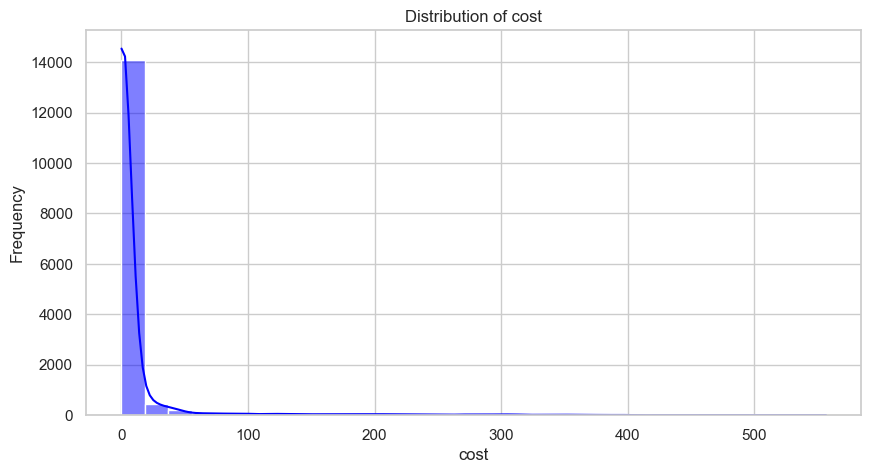

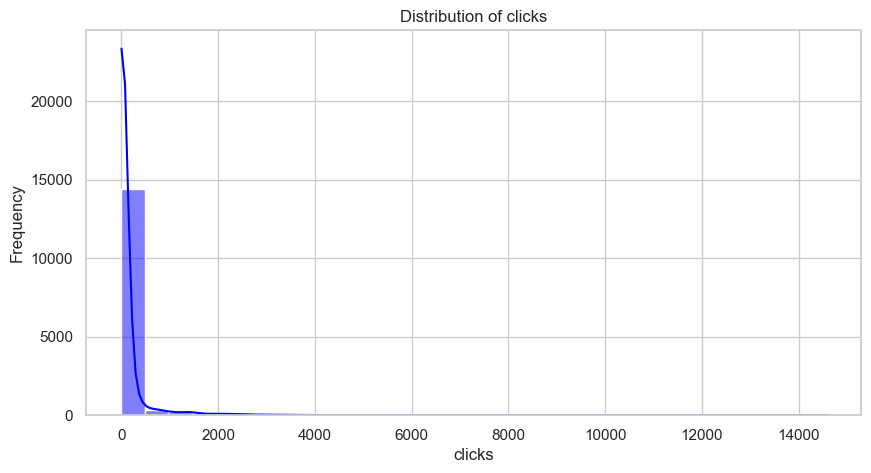

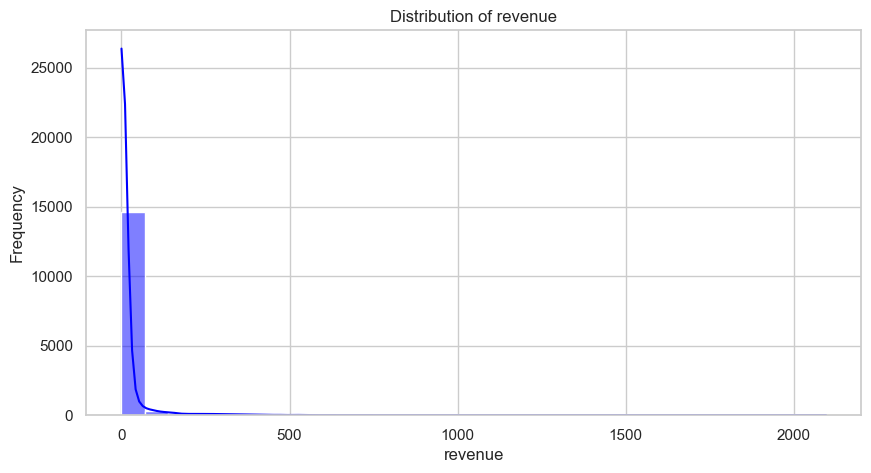

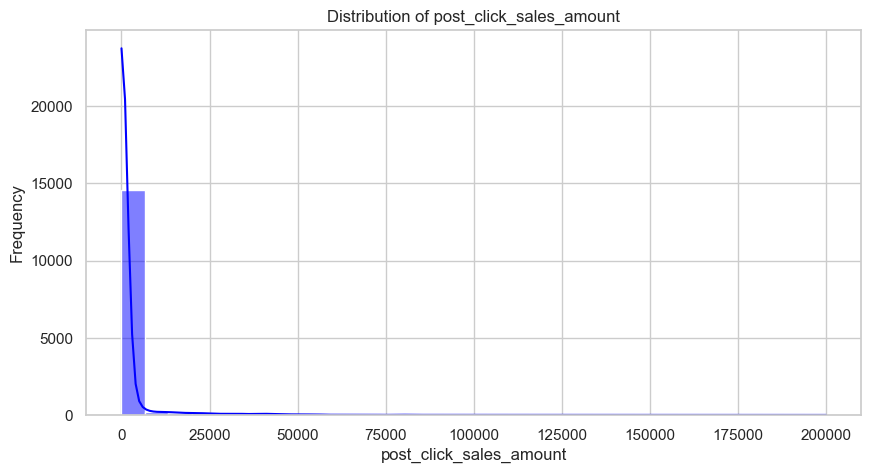

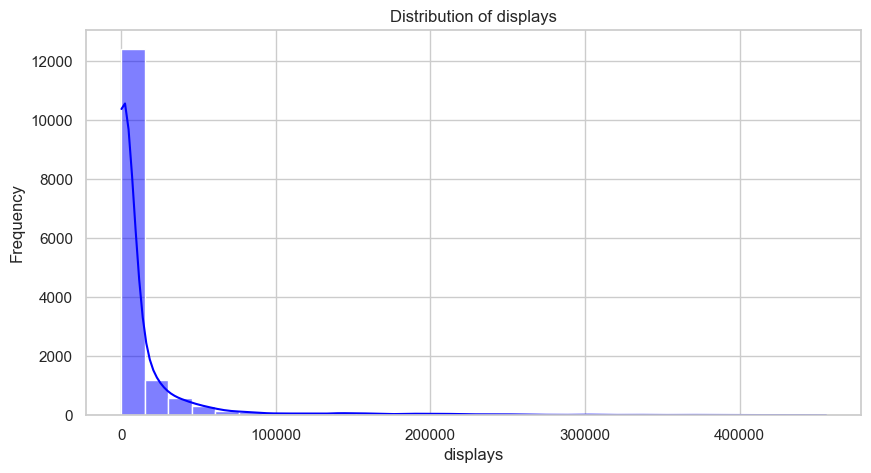

In [8]:
# Plot distribution of 'cost', 'clicks', 'revenue', 'displays'
numeric_columns = ['cost', 'clicks', 'revenue', 'post_click_sales_amount', 'displays']
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

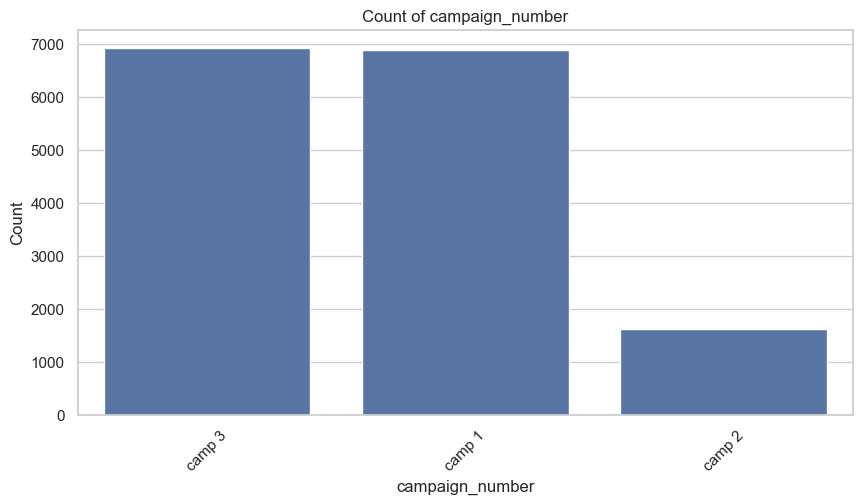

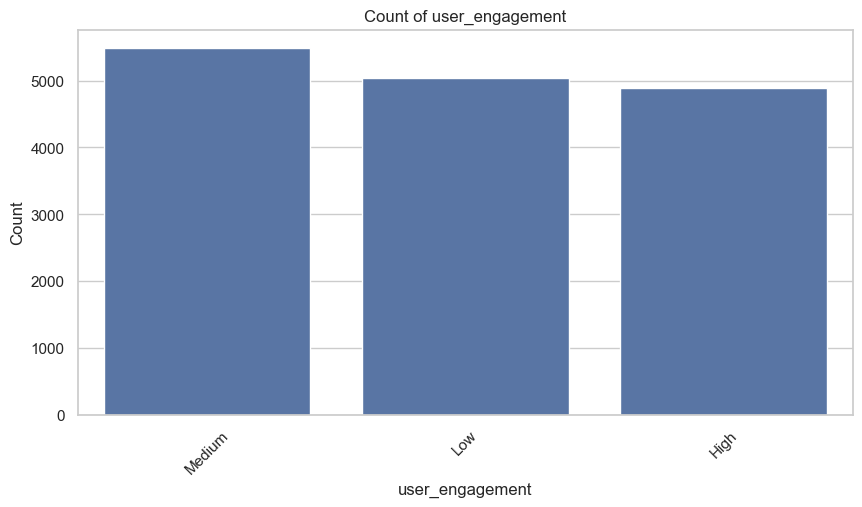

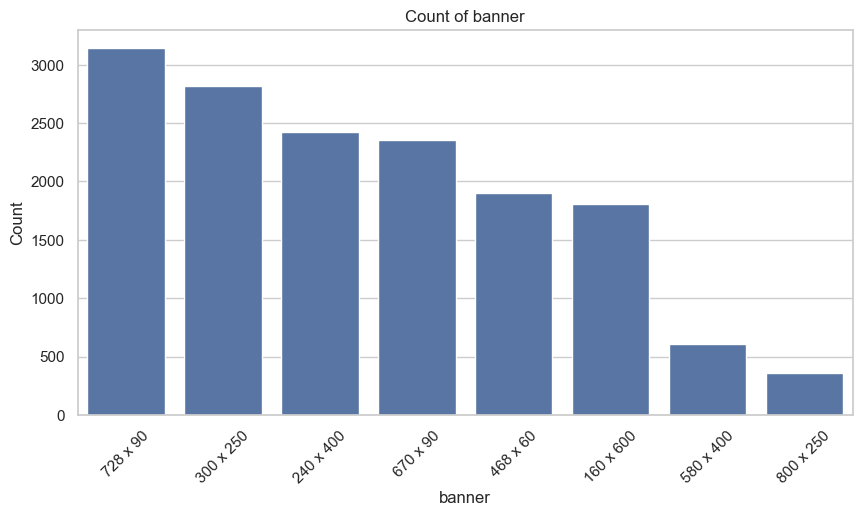

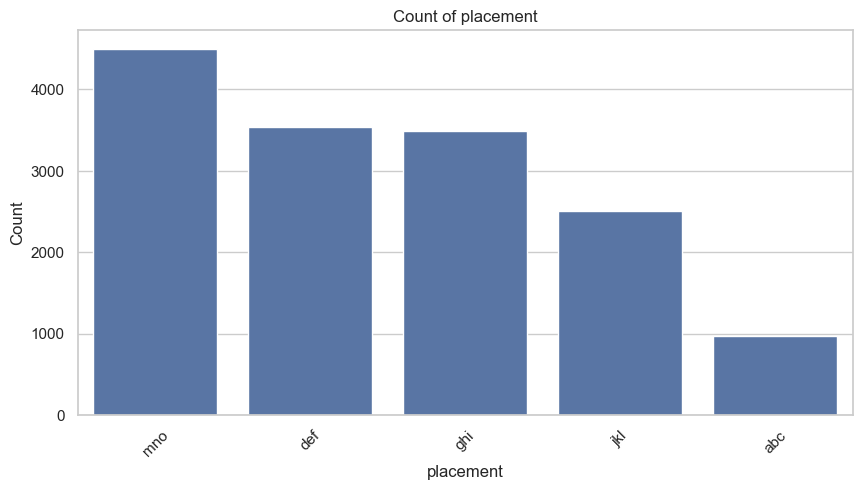

In [9]:
# Categorical Columns - Bar Plot
categorical_columns = ['campaign_number', 'user_engagement', 'banner', 'placement']
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


Numeric Columns for Correlation:
Index(['day', 'displays', 'cost', 'clicks', 'revenue',
       'post_click_conversions', 'post_click_sales_amount'],
      dtype='object')


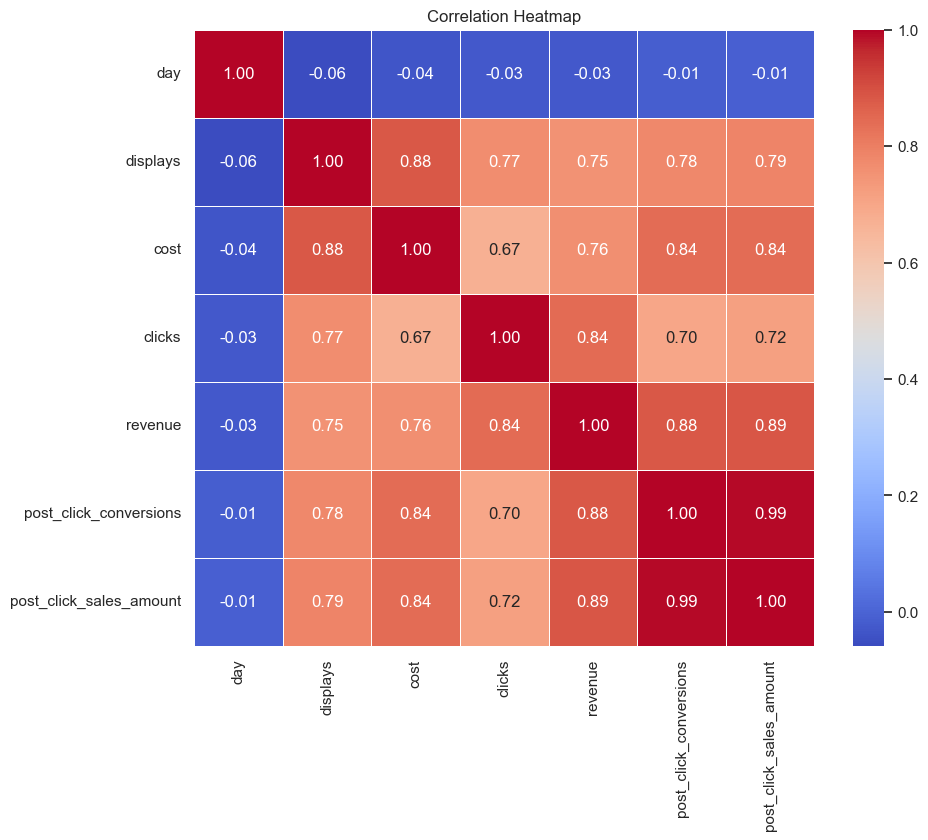

In [10]:
# Filter only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Check for numeric columns being used
print("\nNumeric Columns for Correlation:")
print(numeric_df.columns)

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

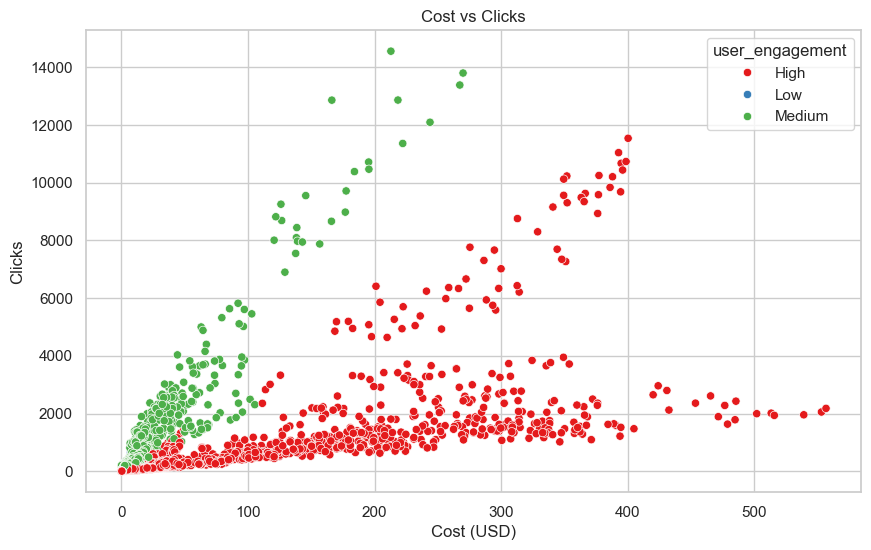

In [11]:
# Scatter Plots for cost vs clicks, displays vs clicks
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cost', y='clicks', data=df, hue='user_engagement', palette='Set1')
plt.title("Cost vs Clicks")
plt.xlabel("Cost (USD)")
plt.ylabel("Clicks")
plt.show()

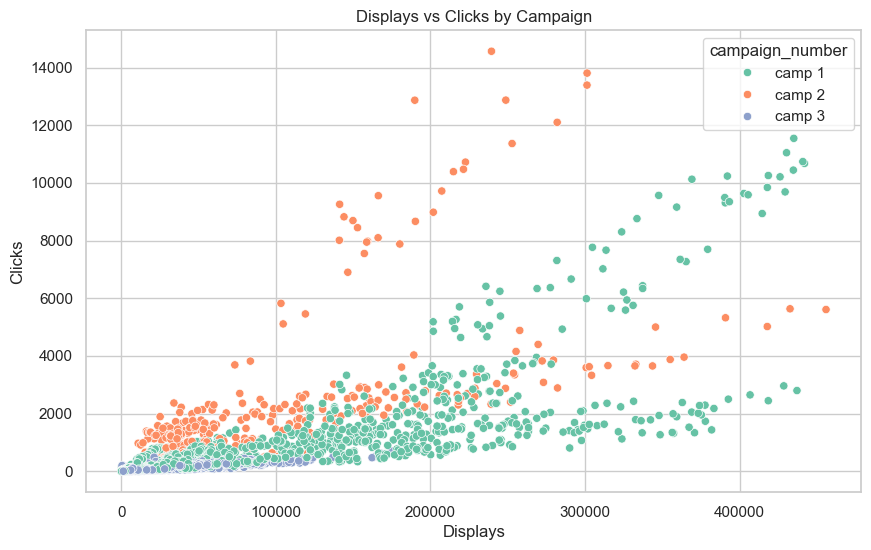

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='displays', y='clicks', data=df, hue='campaign_number', palette='Set2')
plt.title("Displays vs Clicks by Campaign")
plt.xlabel("Displays")
plt.ylabel("Clicks")
plt.show()

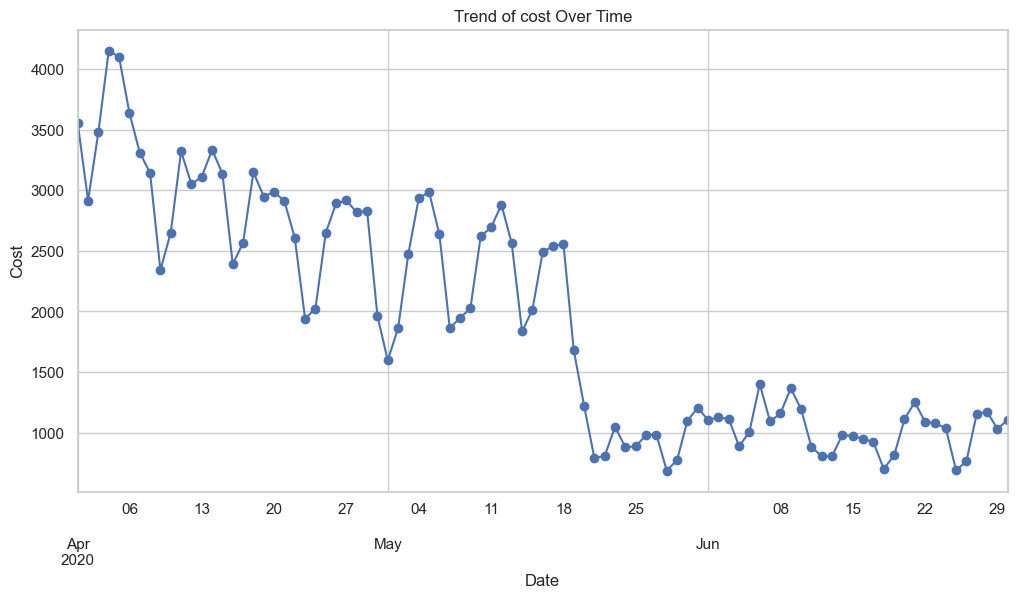

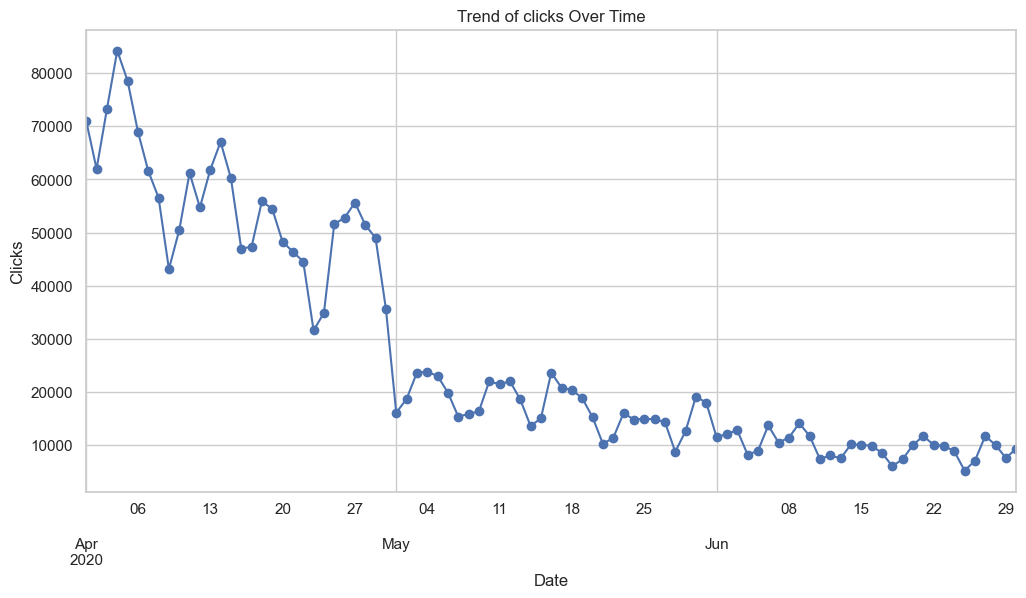

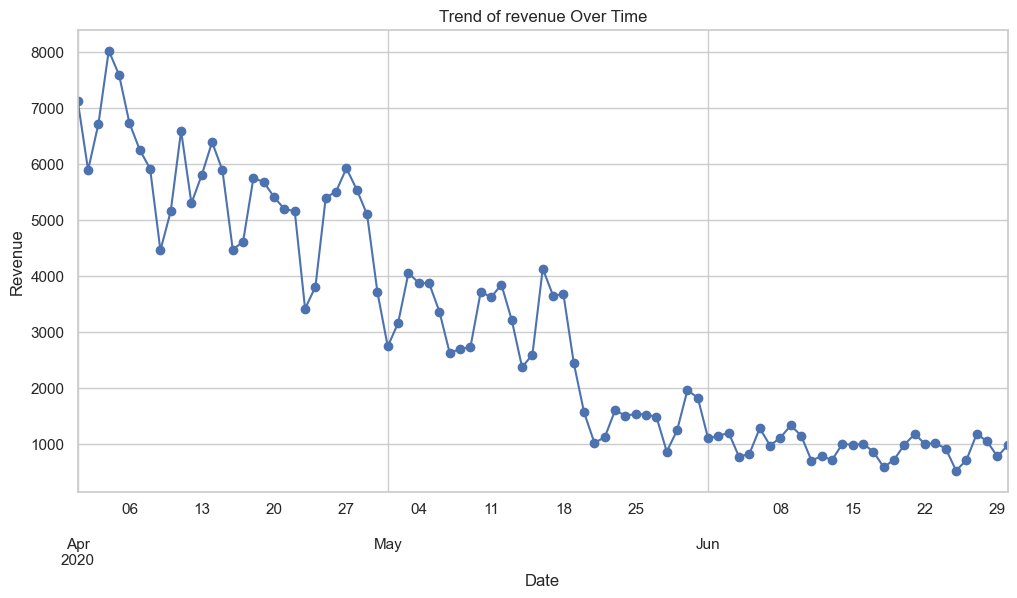

In [13]:
# Combine 'month' and 'day' into a 'date' column
df['date'] = pd.to_datetime(df['month'] + " " + df['day'].astype(str) + ", 2020")
df = df.drop(columns=['month', 'day'])  # Drop the original columns

# Time Series for Cost, Clicks, Revenue
time_series_metrics = ['cost', 'clicks', 'revenue']
for metric in time_series_metrics:
    plt.figure(figsize=(12, 6))
    df_grouped = df.groupby('date')[metric].sum()
    df_grouped.plot(kind='line', marker='o')
    plt.title(f"Trend of {metric} Over Time")
    plt.xlabel("Date")
    plt.ylabel(metric.capitalize())
    plt.show()

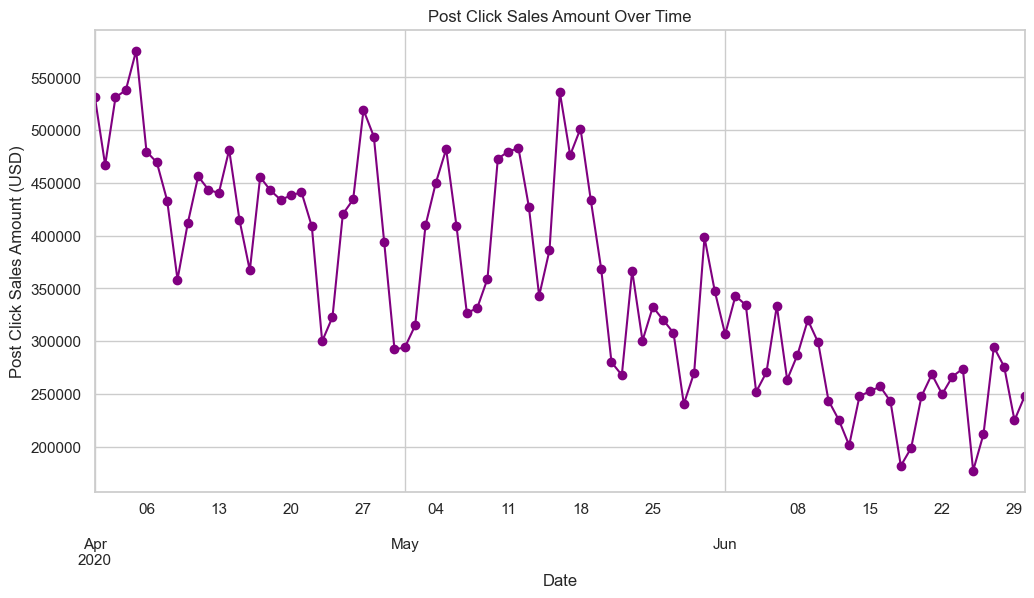

In [14]:
# Post Click Sales Amount Over Time
plt.figure(figsize=(12, 6))
df_grouped_sales = df.groupby('date')['post_click_sales_amount'].sum()
df_grouped_sales.plot(kind='line', color='purple', marker='o')
plt.title("Post Click Sales Amount Over Time")
plt.xlabel("Date")
plt.ylabel("Post Click Sales Amount (USD)")
plt.show()

# Data Preprocessing

In [15]:
# Handling Missing Values
# Check which columns have missing values
print("\nMissing Values Before Handling:")
print(df.isnull().sum())

# Drop rows where 'placement' has missing values (non-critical feature)
df = df.dropna(subset=['placement'])

# Confirm no more missing values
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values Before Handling:
campaign_number              0
user_engagement              0
banner                       0
placement                  413
displays                     0
cost                         0
clicks                       0
revenue                      0
post_click_conversions       0
post_click_sales_amount      0
date                         0
dtype: int64

Missing Values After Handling:
campaign_number            0
user_engagement            0
banner                     0
placement                  0
displays                   0
cost                       0
clicks                     0
revenue                    0
post_click_conversions     0
post_click_sales_amount    0
date                       0
dtype: int64


# Feature Engineering

In [16]:

# Adding New Features

# a) Click Through Rate (CTR): Clicks / Displays (percentage)
df['ctr'] = (df['clicks'] / df['displays']) * 100
df['ctr'] = df['ctr'].fillna(0)  # Replace NaN CTRs (where displays=0) with 0

# b) Cost Per Click (CPC): Cost / Clicks
df['cpc'] = df['cost'] / df['clicks']
df['cpc'] = df['cpc'].replace([np.inf, -np.inf], np.nan).fillna(0)  # Handle division by 0

# c) Cost Per Thousand Impressions (CPM): Cost / (Displays/1000)
df['cpm'] = df['cost'] / (df['displays'] / 1000)
df['cpm'] = df['cpm'].replace([np.inf, -np.inf], np.nan).fillna(0)  # Handle division by 0

# d) Revenue Per Click (RPC): Revenue / Clicks
df['rpc'] = df['revenue'] / df['clicks']
df['rpc'] = df['rpc'].replace([np.inf, -np.inf], np.nan).fillna(0)  # Handle division by 0

# e) Engagement Level Mapping
# Map 'High', 'Medium', 'Low' to 3, 2, 1 for user_engagement
engagement_mapping = {'High': 3, 'Medium': 2, 'Low': 1}
df['engagement_level'] = df['user_engagement'].map(engagement_mapping)

df.head()

,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,date,ctr,cpc,cpm,rpc,engagement_level
0,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,2020-04-01,0.000000,0.000000,1.500000,0.000000,3
1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,2020-04-01,0.783342,0.169509,1.327833,0.183365,3
2,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,2020-04-01,1.074757,0.174876,1.879491,0.183399,3
3,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,2020-04-01,1.048704,0.120754,1.266357,0.183436,3
4,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,2020-04-01,0.181159,0.067000,0.121377,0.183400,1


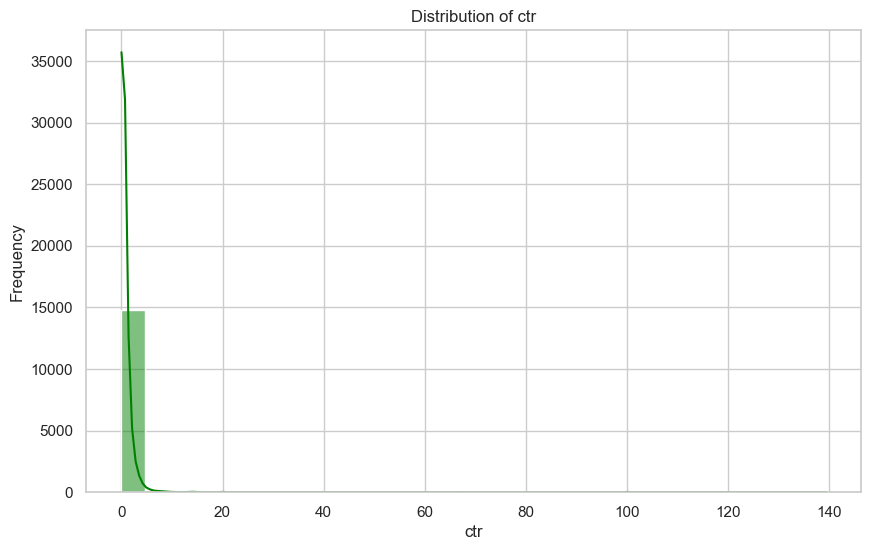

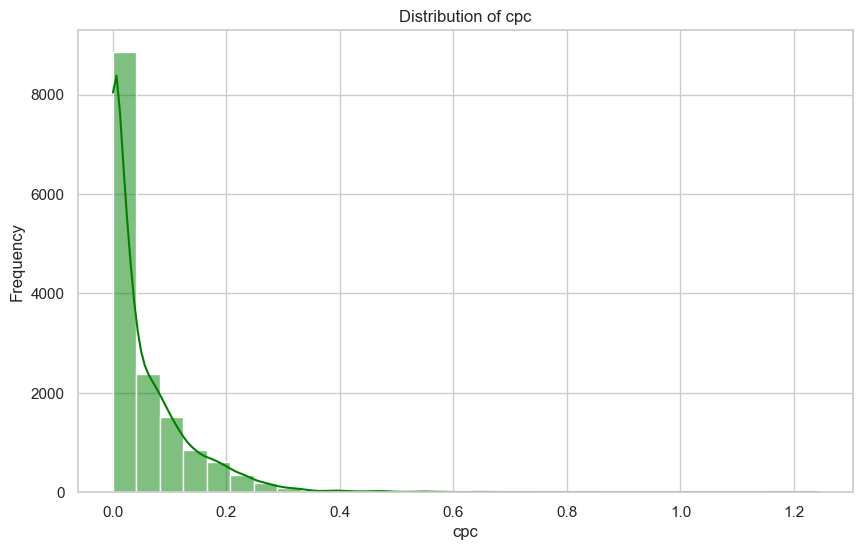

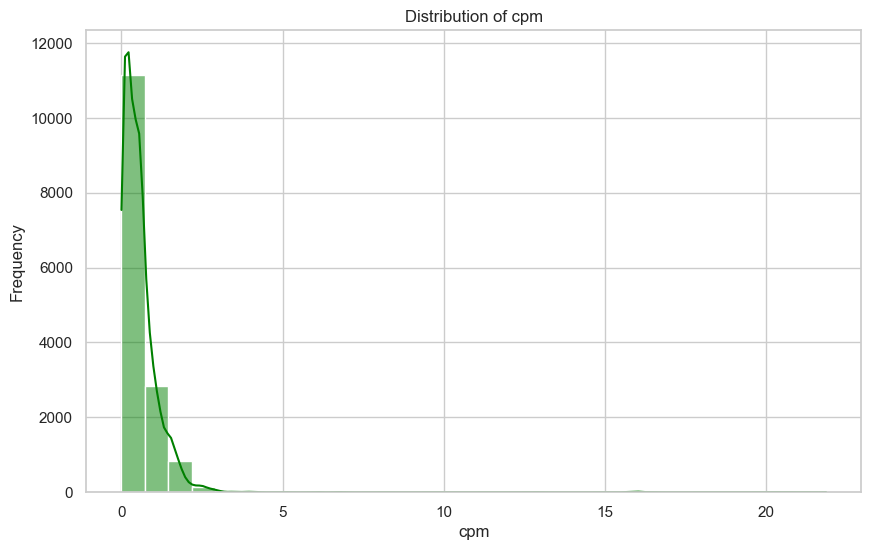

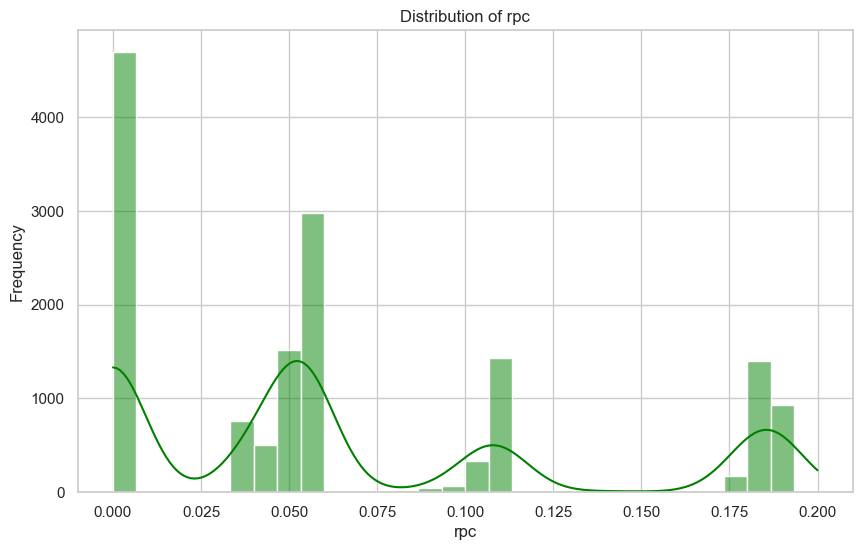

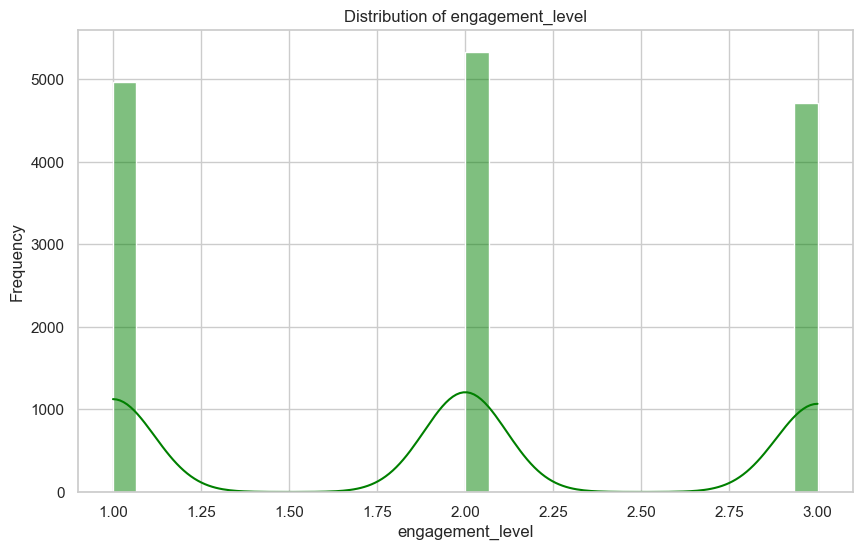

In [17]:
# Plot distributions of new features
new_features = ['ctr', 'cpc', 'cpm', 'rpc', 'engagement_level']

for feature in new_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True, bins=30, color='green')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

# Data Splitting and Feature Scaling

In [18]:
# Feature Selection
X = df[['displays', 'cost', 'clicks', 'ctr', 'cpc', 'cpm', 'rpc', 'engagement_level']]
y = df['post_click_sales_amount']

X = X.copy()
# Replace infinity (`inf`) values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)
# Fill remaining NaN values 
X.fillna(0, inplace=True)  # Replace NaN with 0

# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building and Evaluation

## 1. Linear Regression (Baseline Model)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression - Evaluation Results")
print(f"MAE: {mae_lr:.2f}")
print(f"MSE: {mse_lr:.2f}")
print(f"R²: {r2_lr:.2f}")

Linear Regression - Evaluation Results
MAE: 1502.40
MSE: 22228825.57
R²: 0.70


## 2. Random Forest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Random Forest with reasonable hyperparameters
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - Evaluation Results")
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"R²: {r2_rf:.2f}")

Random Forest - Evaluation Results
MAE: 426.83
MSE: 3308203.15
R²: 0.96


## 3. Gradient Boosting (XGBoost)

In [21]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize XGBoost model with reasonable parameters
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost - Evaluation Results")
print(f"MAE: {mae_xgb:.2f}")
print(f"MSE: {mse_xgb:.2f}")
print(f"R²: {r2_xgb:.2f}")

XGBoost - Evaluation Results
MAE: 433.42
MSE: 3649253.53
R²: 0.95


## Data Standardization for Scaled Models

In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Support Vector Machine

In [23]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize SVR with RBF kernel
svr_model = SVR(kernel='rbf', C=10, gamma='scale')

# Train the model (using scaled data)
svr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate the model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("SVR - Evaluation Results")
print(f"MAE: {mae_svr:.2f}")
print(f"MSE: {mse_svr:.2f}")
print(f"R²: {r2_svr:.2f}")

SVR - Evaluation Results
MAE: 1647.59
MSE: 71793173.68
R²: 0.05


## 5. Neural Network

In [24]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize MLP Regressor with one hidden layer
mlp_model = MLPRegressor(
    hidden_layer_sizes=(100,),
    max_iter=300,
    activation='relu',
    random_state=42
)

# Train the model (using scaled data)
mlp_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Evaluate the model
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print("MLP Regressor - Evaluation Results")
print(f"MAE: {mae_mlp:.2f}")
print(f"MSE: {mse_mlp:.2f}")
print(f"R²: {r2_mlp:.2f}")

MLP Regressor - Evaluation Results
MAE: 1224.48
MSE: 17793354.49
R²: 0.76


# Model Comparison

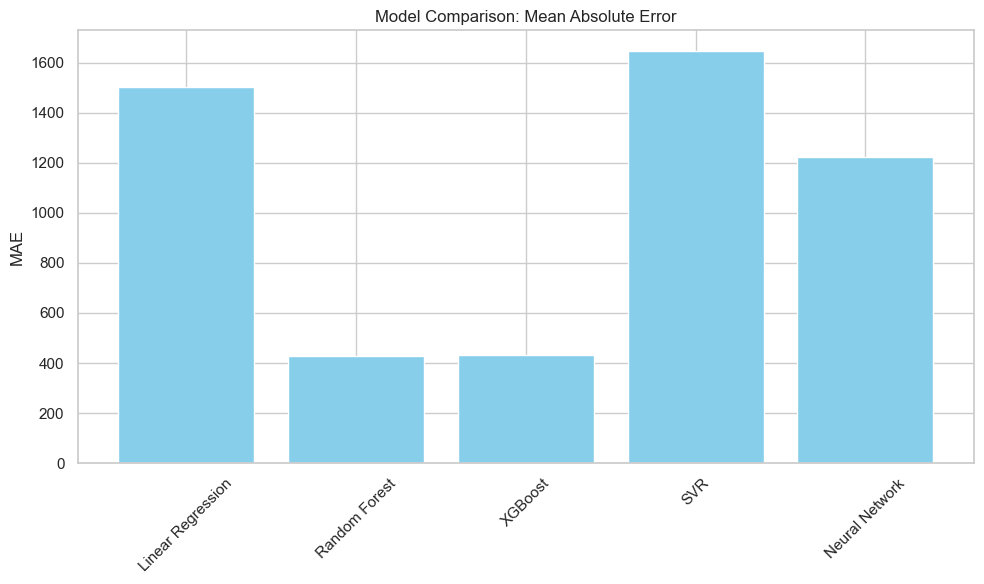

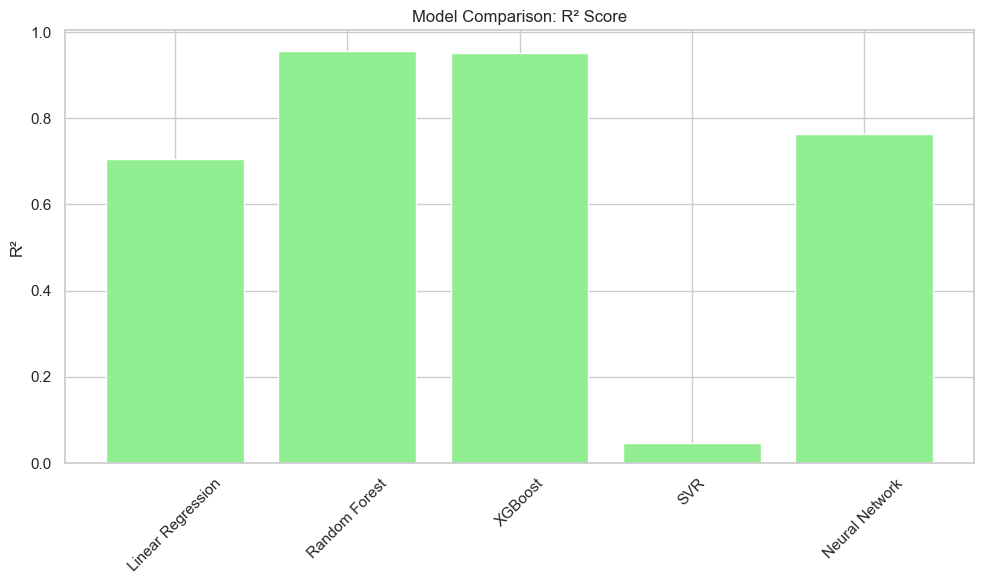

In [25]:
import matplotlib.pyplot as plt

# Define model names
models = ['Linear Regression', 'Random Forest', 'XGBoost', 'SVR', 'Neural Network']

# Define metric lists using the correct variable names
mae = [mae_lr, mae_rf, mae_xgb, mae_svr, mae_mlp]
mse = [mse_lr, mse_rf, mse_xgb, mse_svr, mse_mlp]
r2 = [r2_lr, r2_rf, r2_xgb, r2_svr, r2_mlp]

# Plot MAE
plt.figure(figsize=(10, 6))
plt.bar(models, mae, color='skyblue')
plt.title("Model Comparison: Mean Absolute Error")
plt.ylabel("MAE")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot R² Score
plt.figure(figsize=(10, 6))
plt.bar(models, r2, color='lightgreen')
plt.title("Model Comparison: R² Score")
plt.ylabel("R²")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
# Combine Evaluation Metrics into a Table
evaluation_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'SVR', 'Neural Network'],
    'MAE': [mae_lr, mae_rf, mae_xgb, mae_svr, mae_mlp],
    'MSE': [mse_lr, mse_rf, mse_xgb, mse_svr, mse_mlp],
    'RMSE': [np.sqrt(mse_lr), np.sqrt(mse_rf), np.sqrt(mse_xgb), np.sqrt(mse_svr), np.sqrt(mse_mlp)],
    'R² Score': [r2_lr, r2_rf, r2_xgb, r2_svr, r2_mlp]
})

# Print the evaluation metrics table
print("\nModel Evaluation Metrics:")
print(evaluation_df)


Model Evaluation Metrics:
               Model          MAE           MSE         RMSE  R² Score
0  Linear Regression  1502.403399  2.222883e+07  4714.745547  0.704924
1      Random Forest   426.826424  3.308203e+06  1818.846655  0.956085
2            XGBoost   433.417545  3.649254e+06  1910.301948  0.951558
3                SVR  1647.585044  7.179317e+07  8473.085252  0.046982
4     Neural Network  1224.479600  1.779335e+07  4218.216980  0.763802


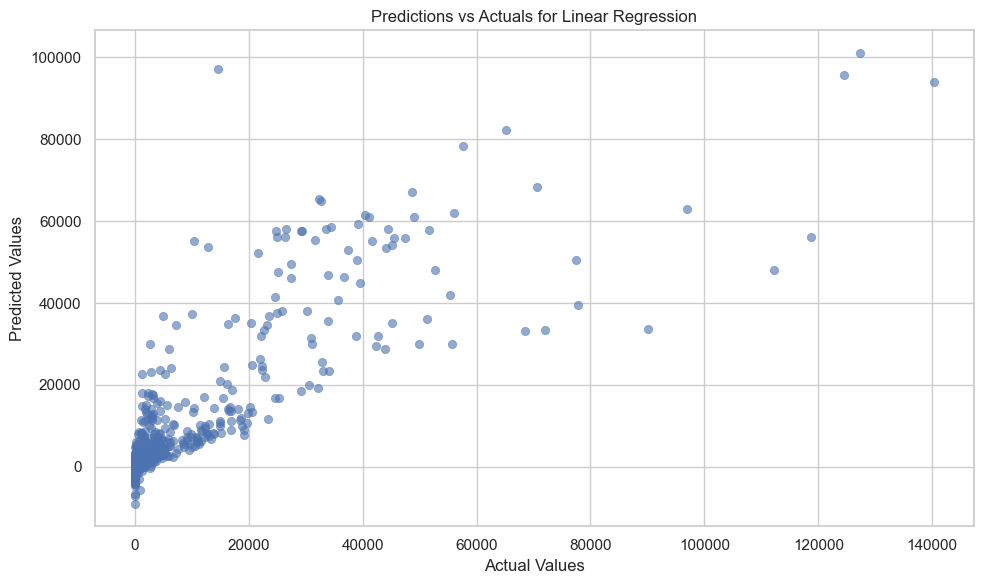

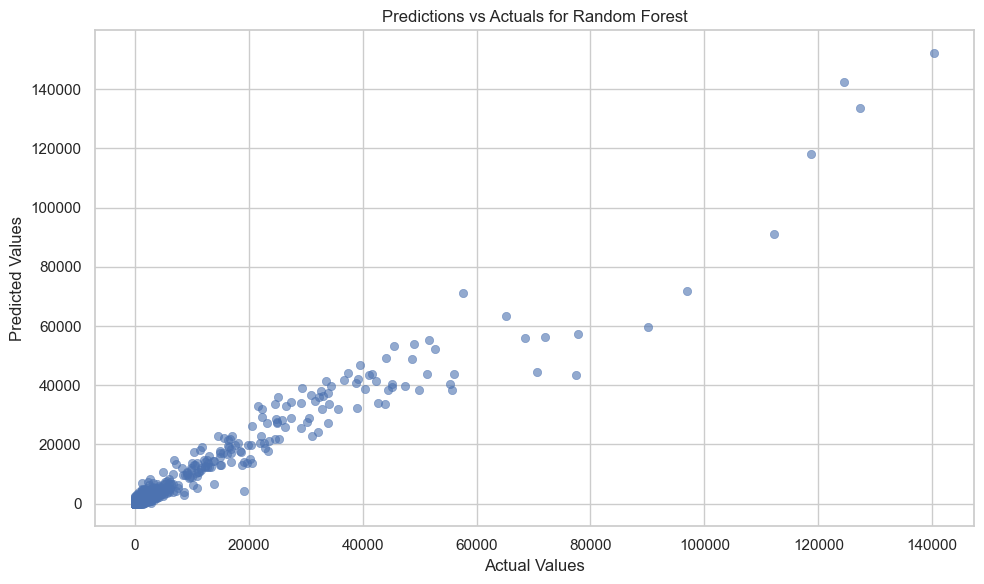

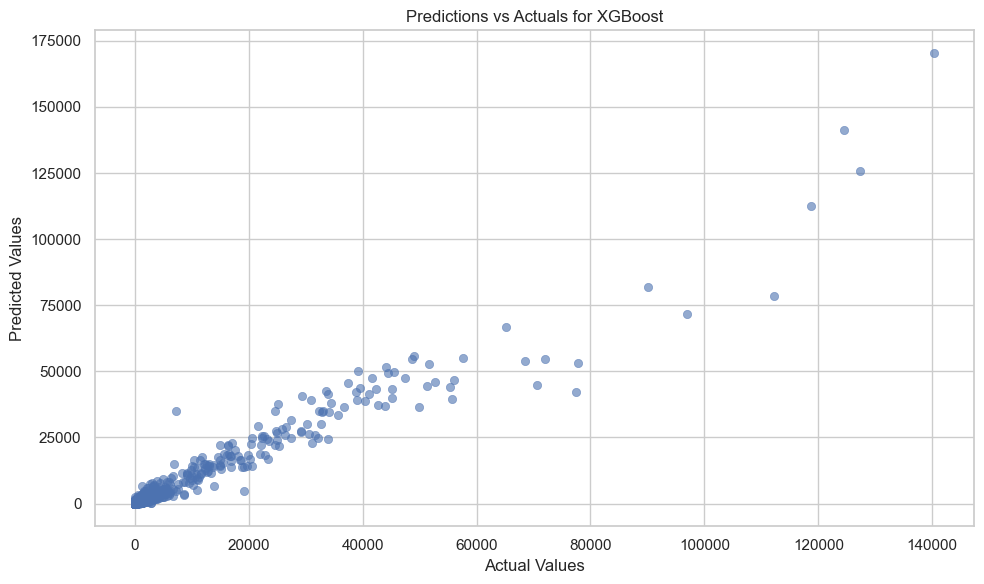

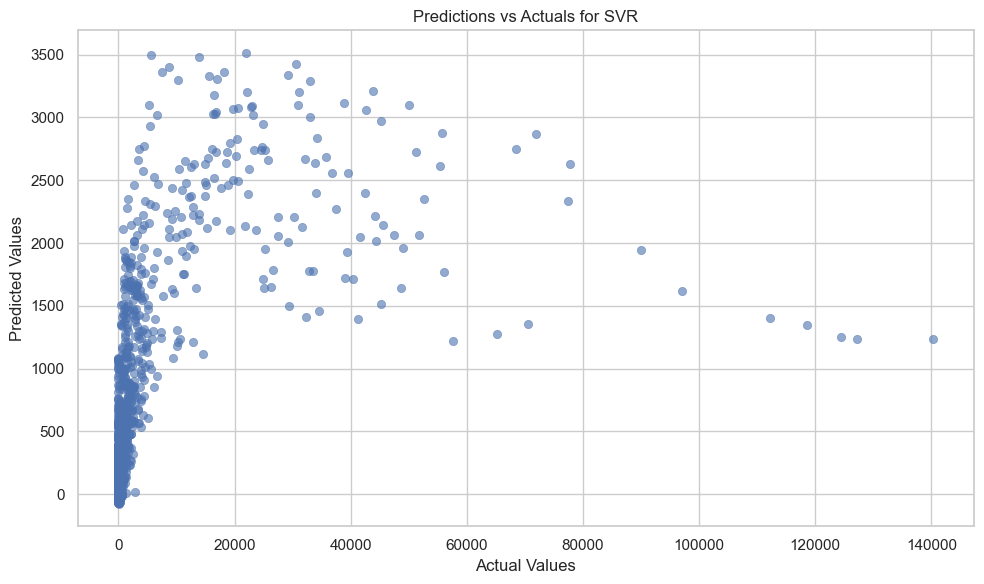

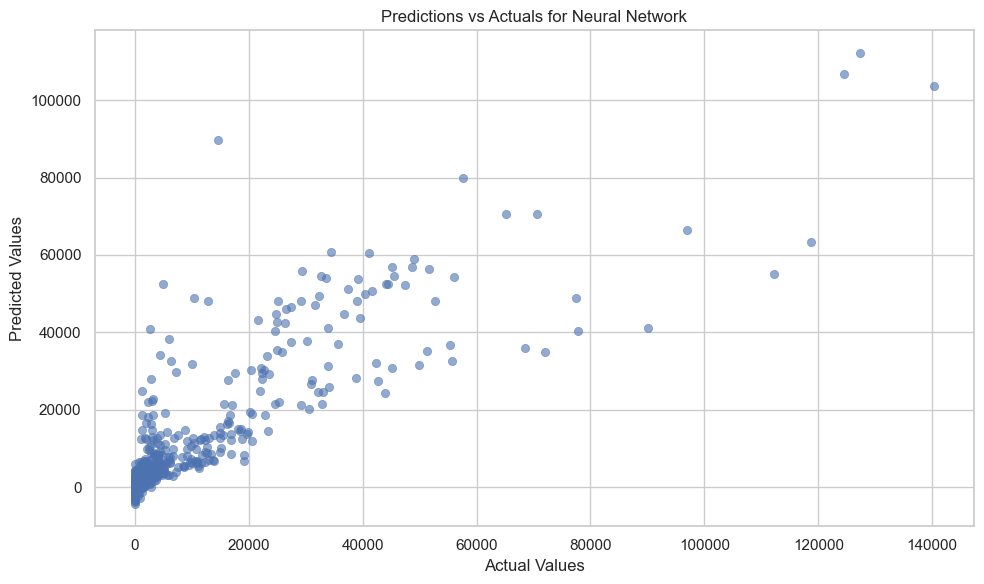

In [27]:
# Predictions vs Actual Scatter Plots
models_predictions = [
    ('Linear Regression', y_pred_lr),
    ('Random Forest', y_pred_rf),
    ('XGBoost', y_pred_xgb),
    ('SVR', y_pred_svr),
    ('Neural Network', y_pred_mlp)
]

for model_name, predictions in models_predictions:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=predictions, alpha=0.6, edgecolor=None)
    plt.title(f"Predictions vs Actuals for {model_name}")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.tight_layout()
    plt.show()

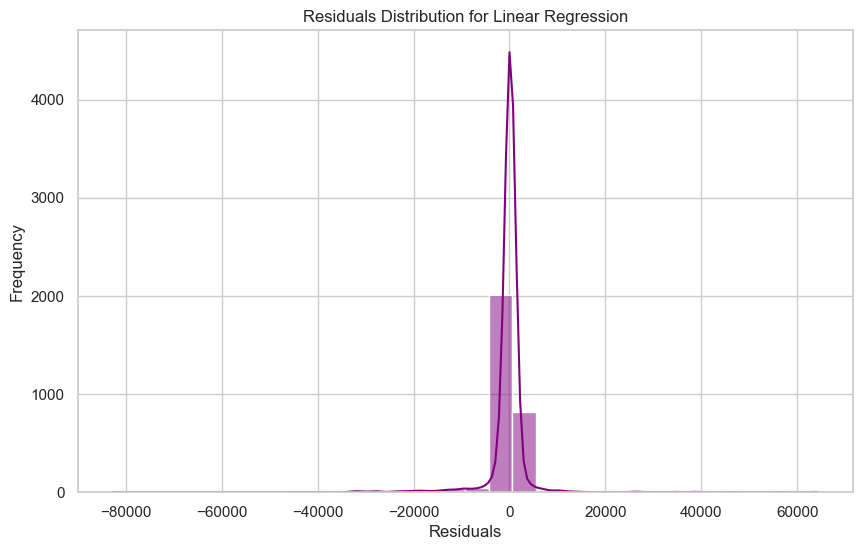

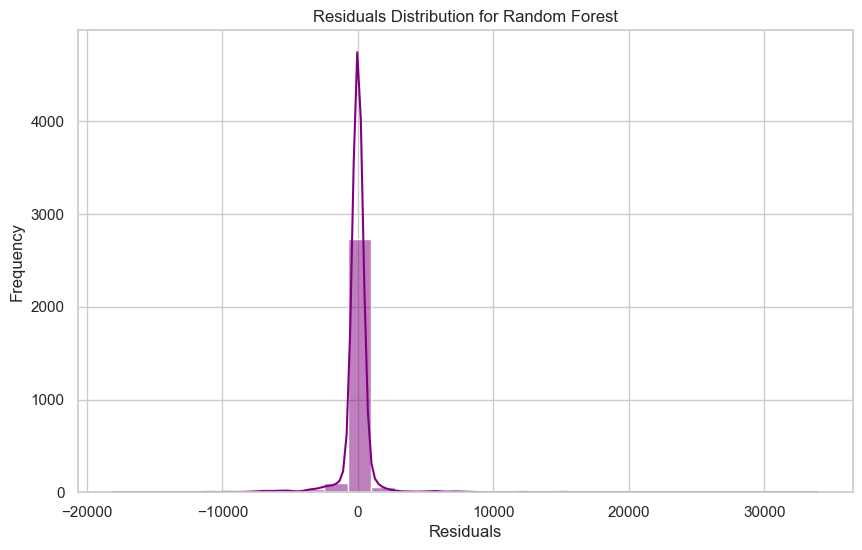

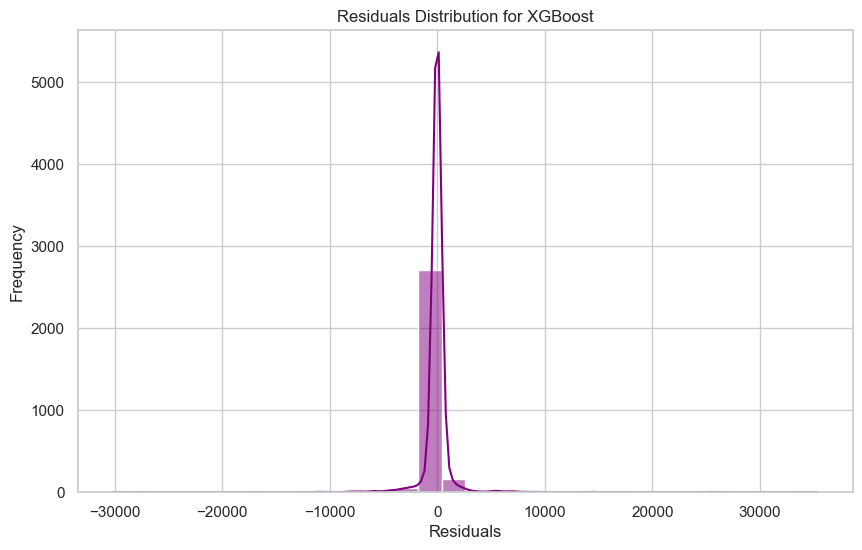

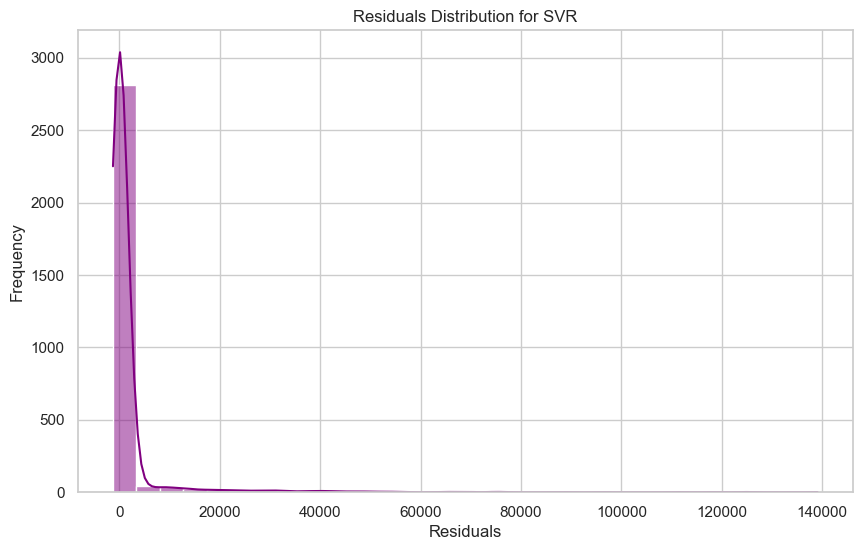

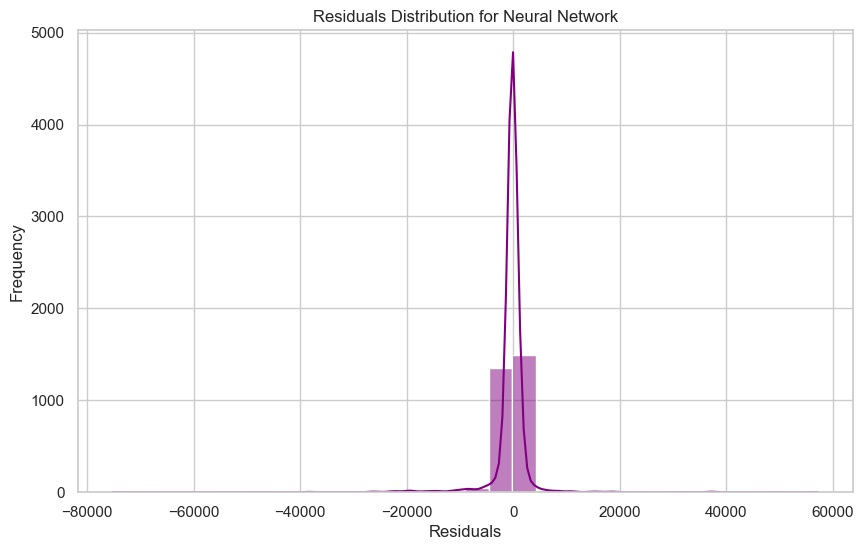

In [28]:
# Residuals Distribution Plots
for model_name, predictions in models_predictions:
    residuals = y_test - predictions
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, bins=30, color='purple')
    plt.title(f"Residuals Distribution for {model_name}")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()

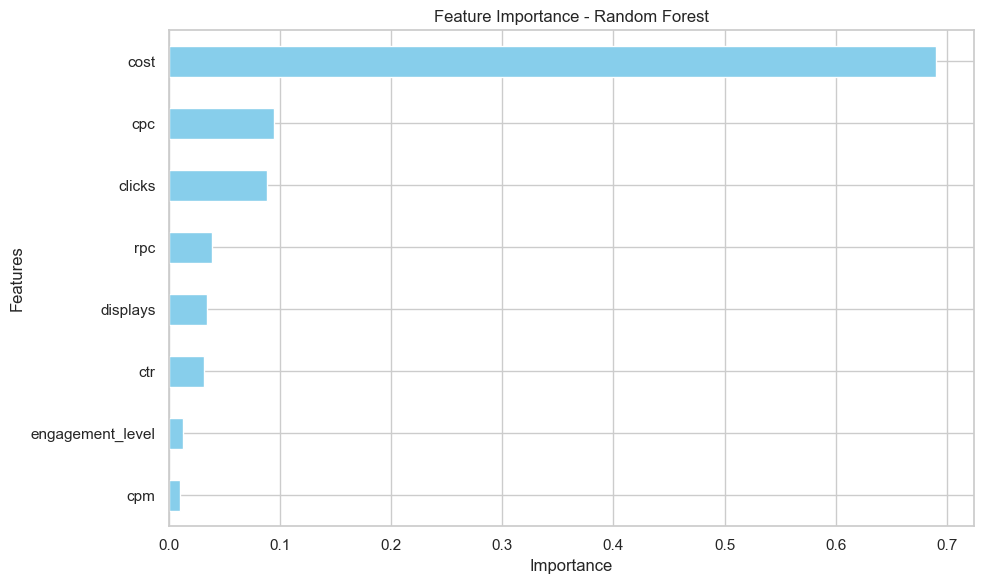

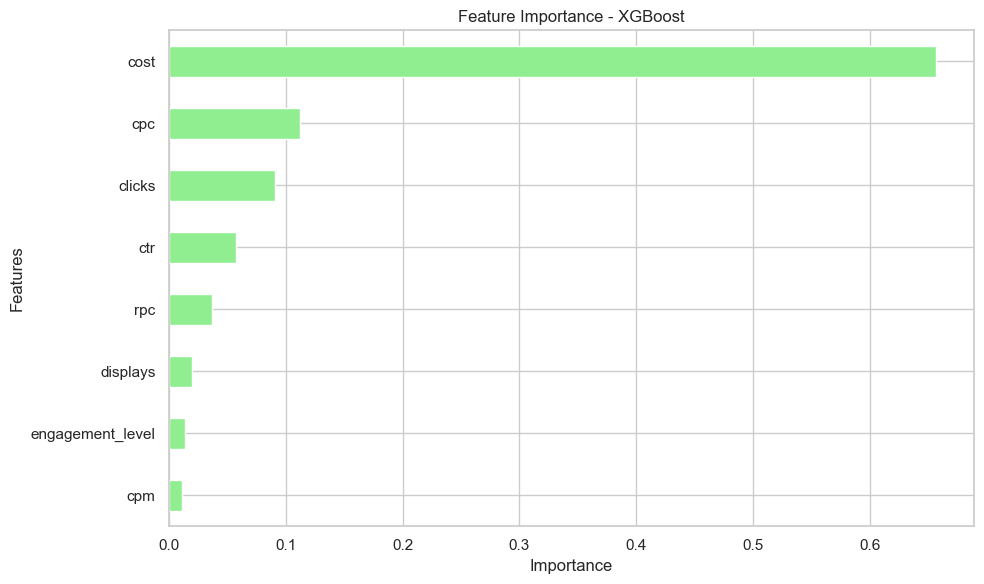

In [29]:
# Random Forest Feature Importance
rf_feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
rf_feature_importance.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# XGBoost Feature Importance
xgb_feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
xgb_feature_importance.sort_values().plot(kind='barh', color='lightgreen')
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()